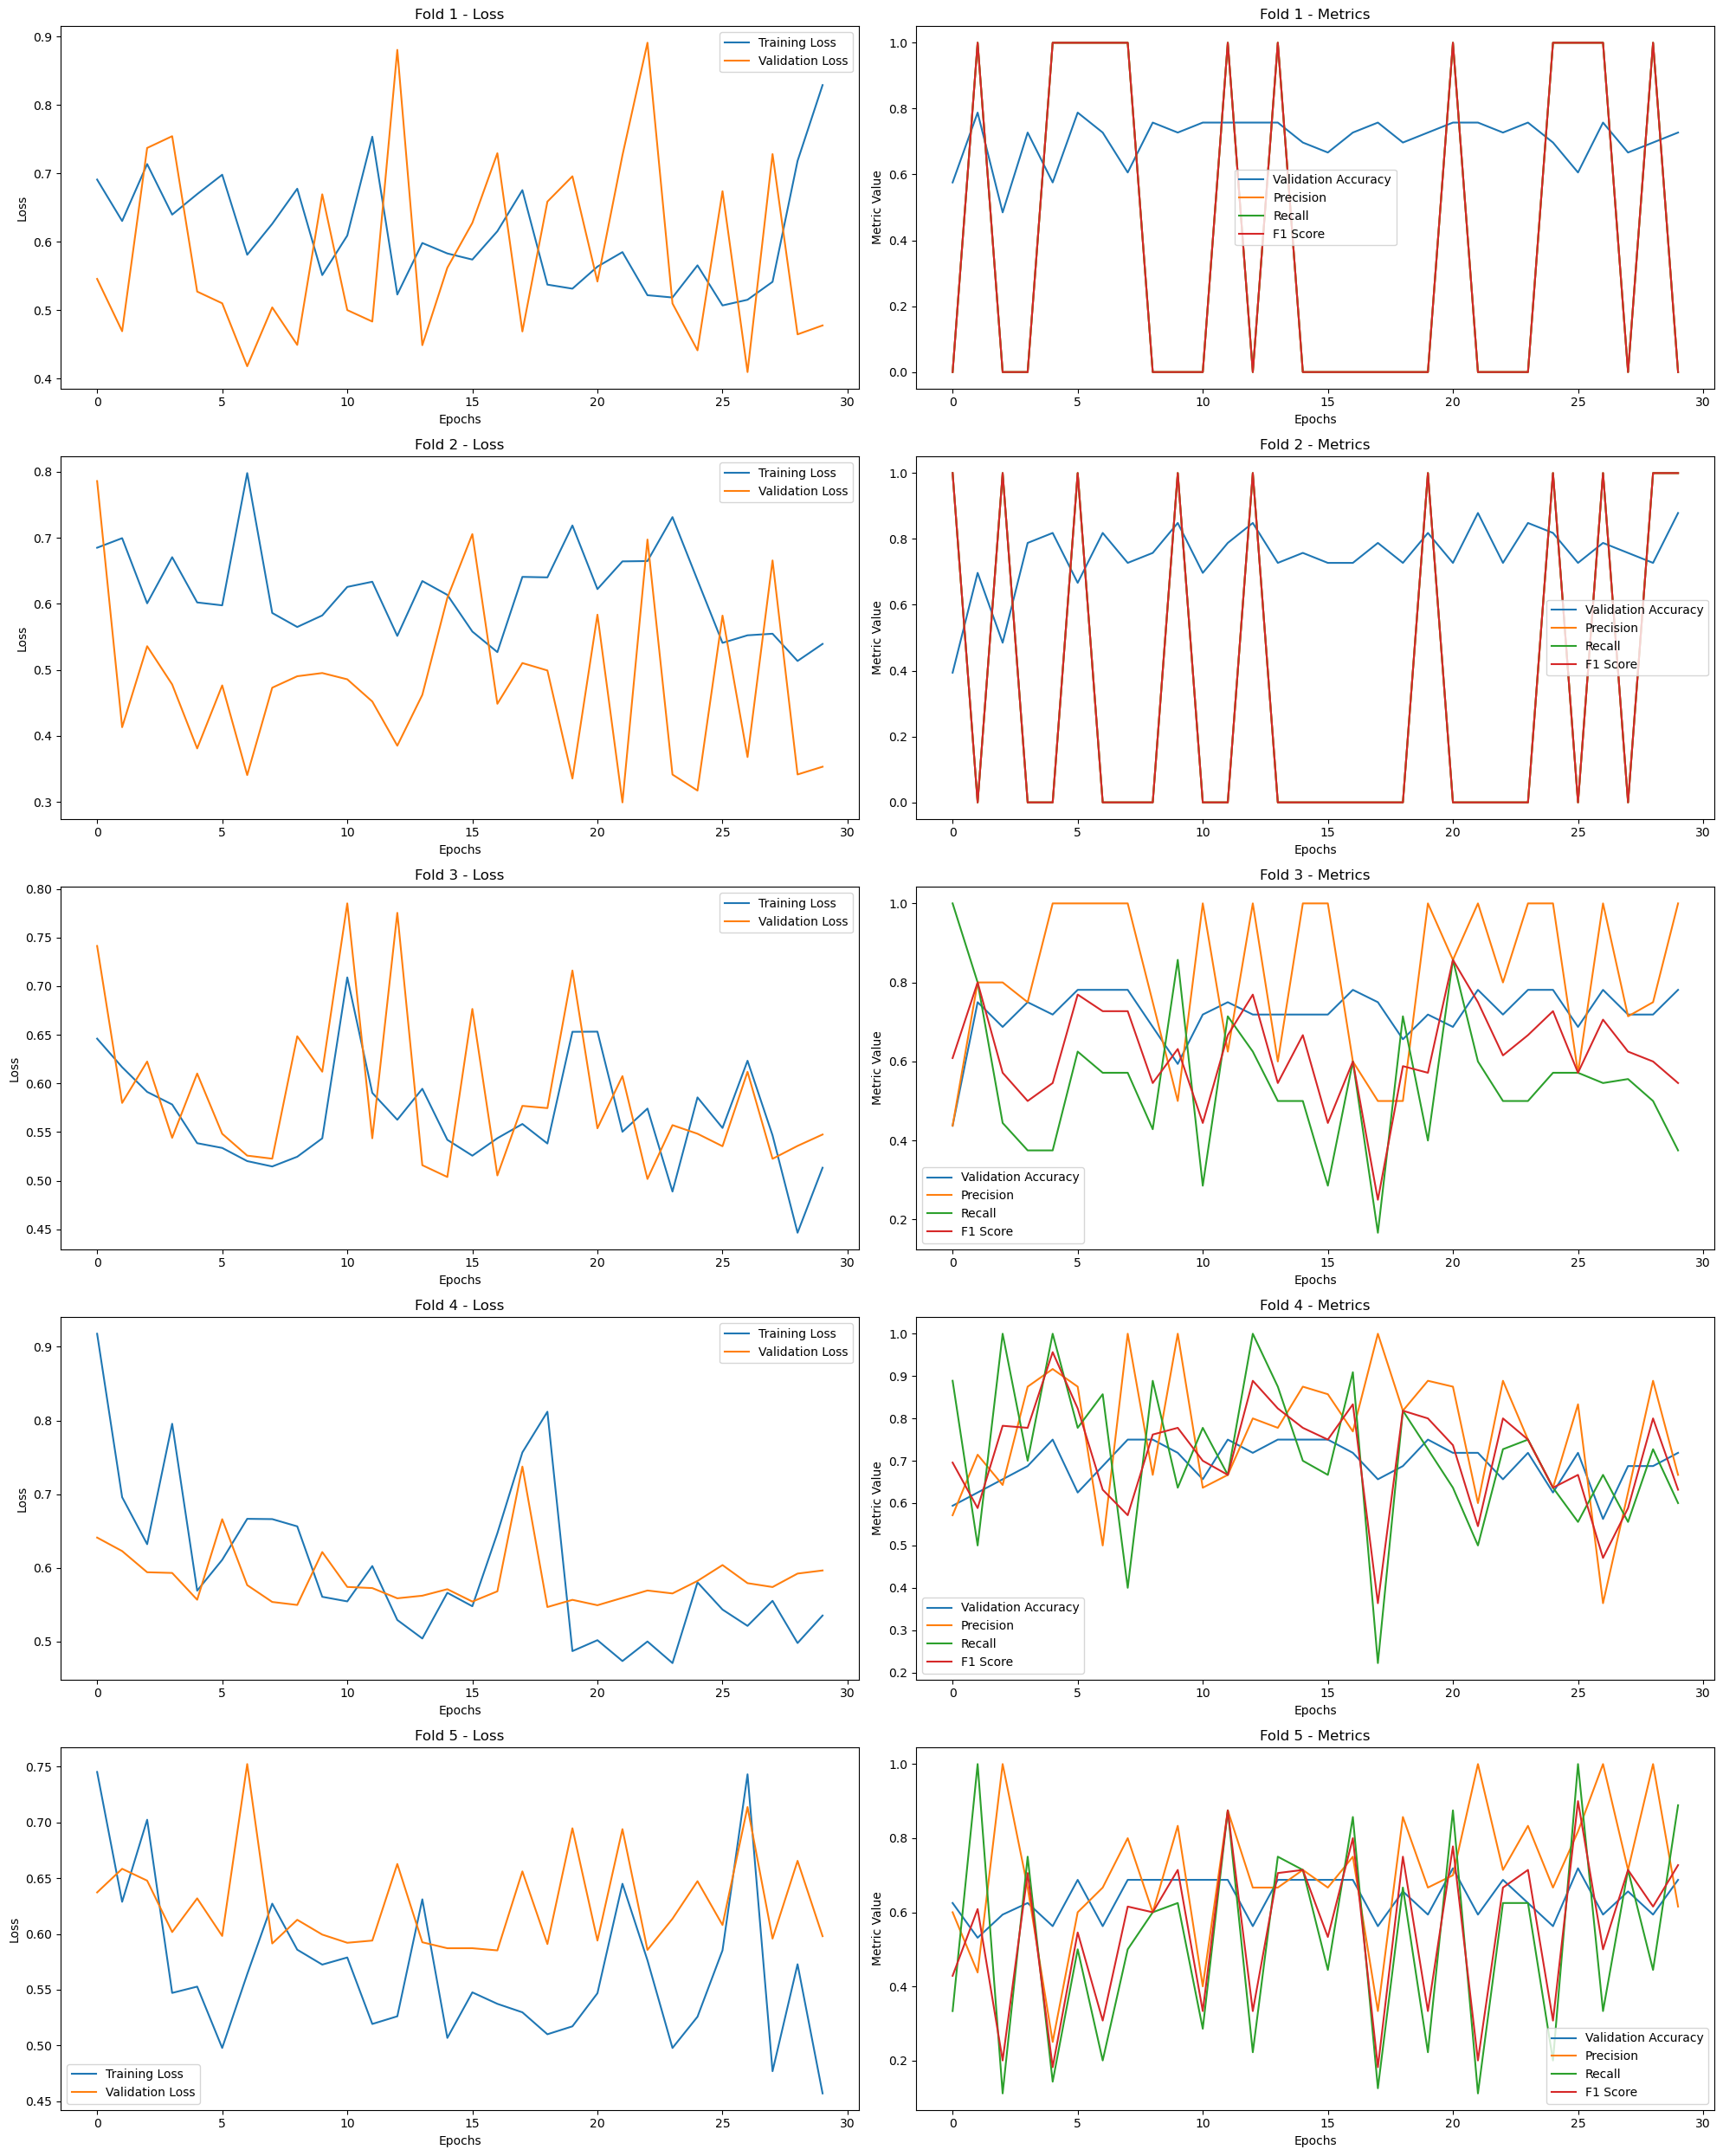


COMPREHENSIVE TENSOR ANALYSIS

Training Losses Analysis:
----------------------------------------
Number of data points: 150
Mean: 0.5924
Median: 0.5740
Standard Deviation: 0.0805
Minimum: 0.4464
Maximum: 0.9176
Normality Test (D'Agostino's K^2 p-value): 0.0000
Distribution: Non-Normal
Wilcoxon signed-rank test p-value: 0.0000


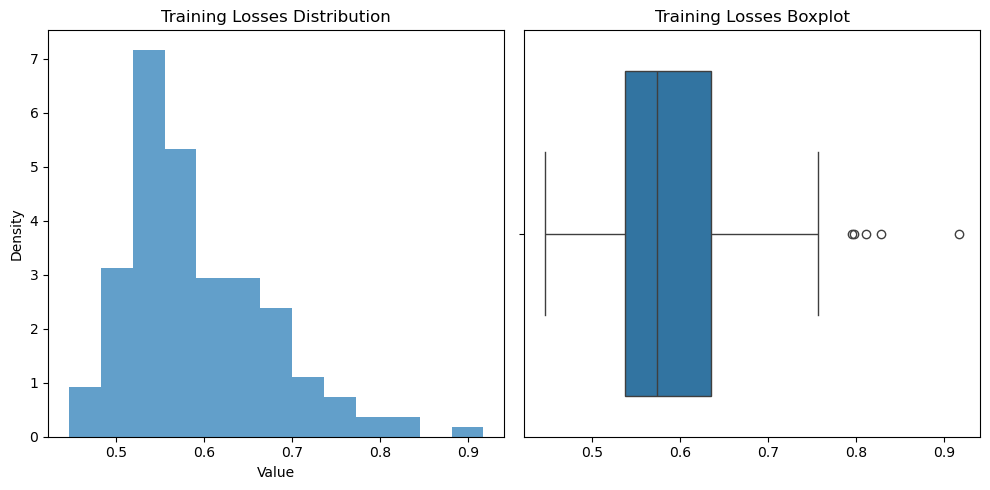


Validation Losses Analysis:
----------------------------------------
Number of data points: 150
Mean: 0.5720
Median: 0.5756
Standard Deviation: 0.1054
Minimum: 0.2991
Maximum: 0.8908
Normality Test (D'Agostino's K^2 p-value): 0.2900
Distribution: Normal
One-sample t-test p-value: 0.0000


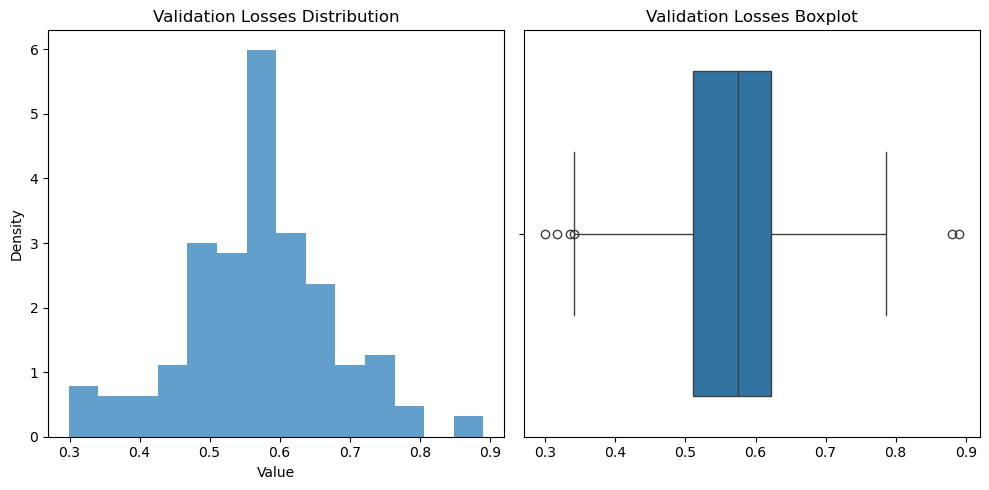


Validation Accuracies Analysis:
----------------------------------------
Number of data points: 150
Mean: 0.7026
Median: 0.7188
Standard Deviation: 0.0800
Minimum: 0.3939
Maximum: 0.8788
Normality Test (D'Agostino's K^2 p-value): 0.0000
Distribution: Non-Normal
Wilcoxon signed-rank test p-value: 0.0000


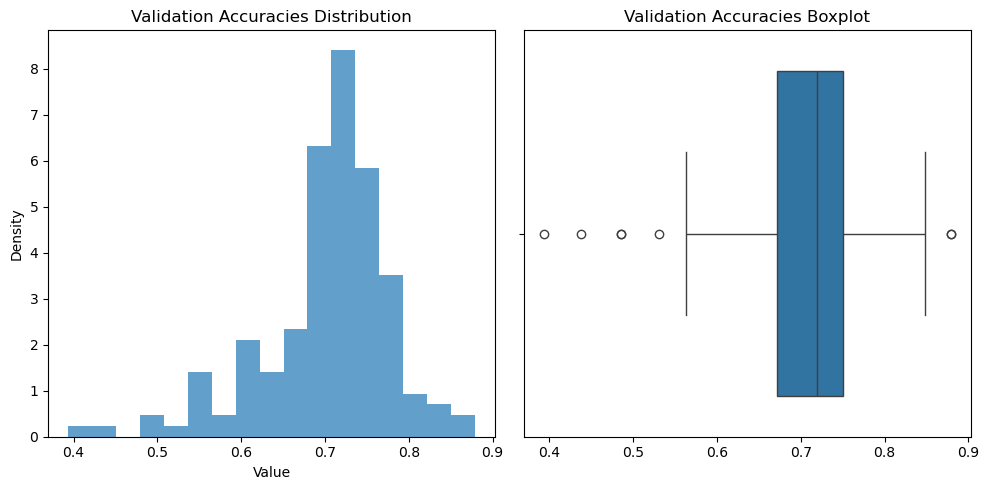


Precisions Analysis:
----------------------------------------
Number of data points: 150
Mean: 0.6043
Median: 0.7143
Standard Deviation: 0.3884
Minimum: 0.0000
Maximum: 1.0000
Normality Test (D'Agostino's K^2 p-value): 0.0000
Distribution: Non-Normal
Wilcoxon signed-rank test p-value: 0.0000


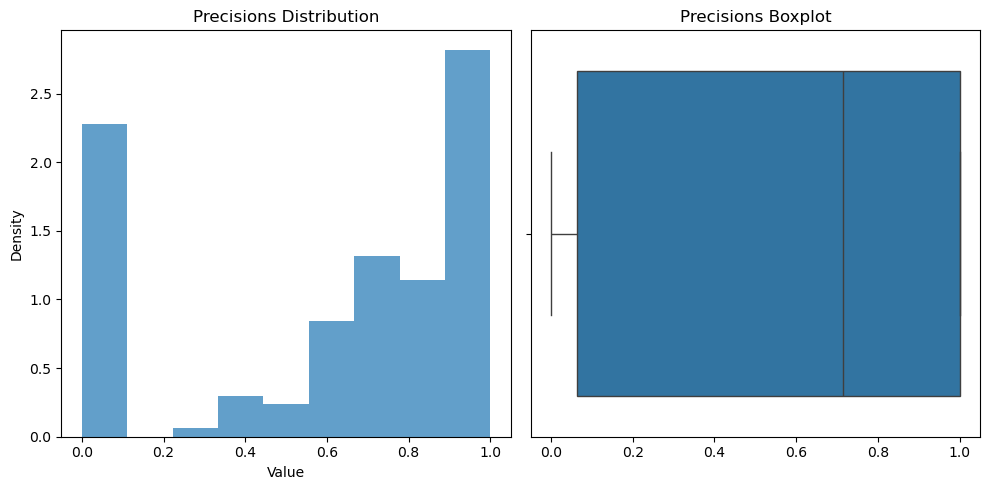


Recalls Analysis:
----------------------------------------
Number of data points: 150
Mean: 0.5035
Median: 0.5635
Standard Deviation: 0.3714
Minimum: 0.0000
Maximum: 1.0000
Normality Test (D'Agostino's K^2 p-value): 0.0000
Distribution: Non-Normal
Wilcoxon signed-rank test p-value: 0.0000


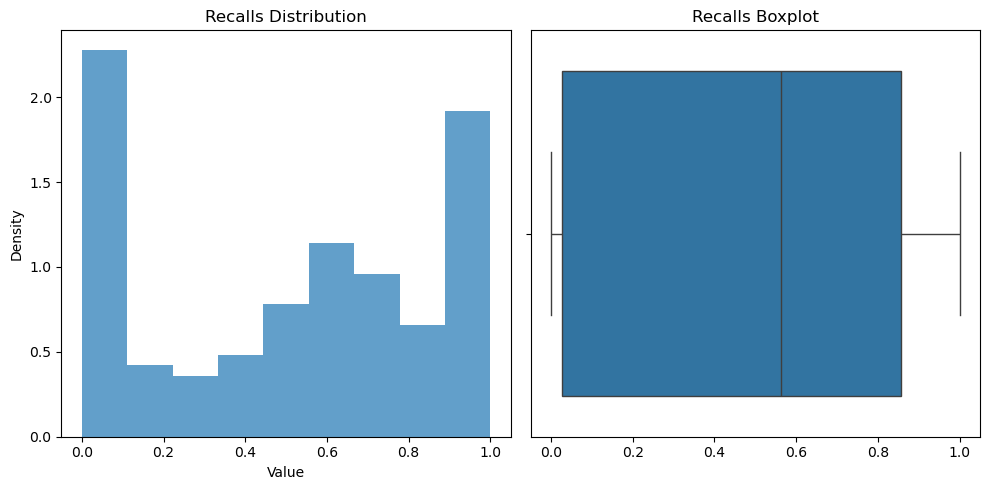


F1 Scores Analysis:
----------------------------------------
Number of data points: 150
Mean: 0.5243
Median: 0.6154
Standard Deviation: 0.3569
Minimum: 0.0000
Maximum: 1.0000
Normality Test (D'Agostino's K^2 p-value): 0.0000
Distribution: Non-Normal
Wilcoxon signed-rank test p-value: 0.0000


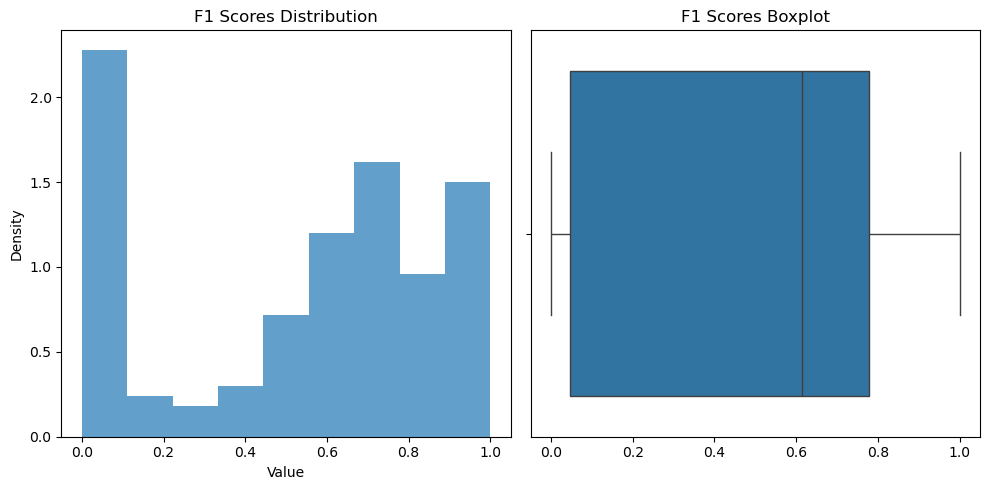


CROSS-CORRELATION ANALYSIS


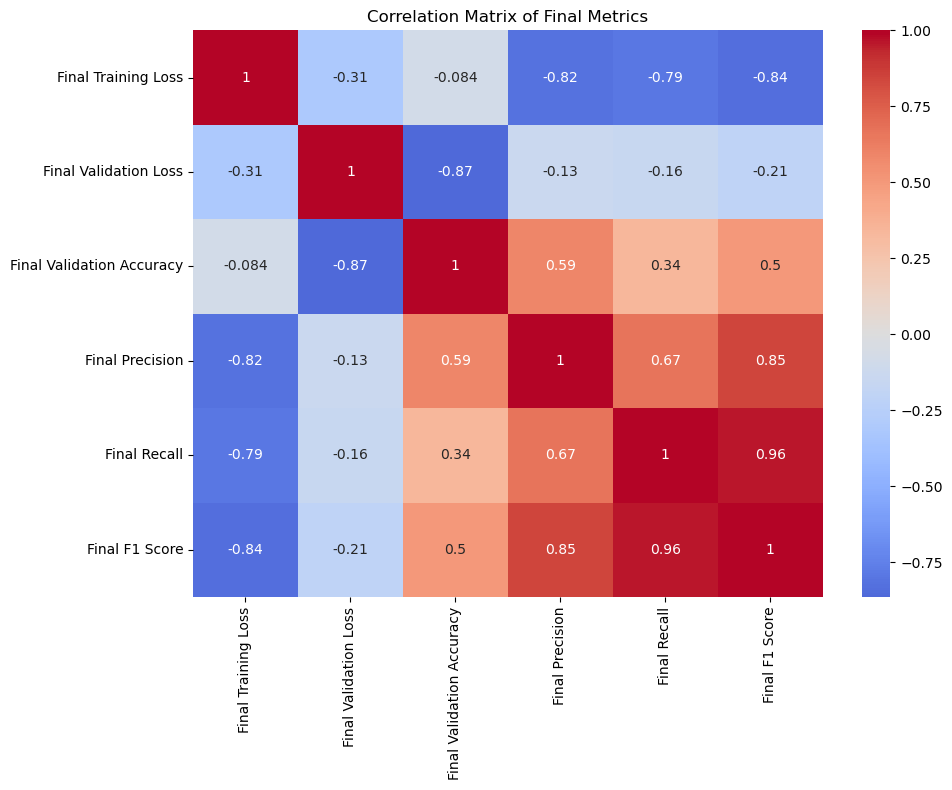


Correlation Matrix:
                           Final Training Loss  Final Validation Loss  \
Final Training Loss                   1.000000              -0.312461   
Final Validation Loss                -0.312461               1.000000   
Final Validation Accuracy            -0.084052              -0.865110   
Final Precision                      -0.820703              -0.134180   
Final Recall                         -0.794604              -0.155276   
Final F1 Score                       -0.839233              -0.205815   

                           Final Validation Accuracy  Final Precision  \
Final Training Loss                        -0.084052        -0.820703   
Final Validation Loss                      -0.865110        -0.134180   
Final Validation Accuracy                   1.000000         0.587092   
Final Precision                             0.587092         1.000000   
Final Recall                                0.340376         0.670381   
Final F1 Score               

In [3]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load the cross-validation results
results = torch.load('k_fold_cross_validation_results.pth')

# Create a figure with 2 plots for each fold
num_folds = len(results)
fig, axs = plt.subplots(num_folds, 2, figsize=(20, 5*num_folds))

# Iterate through each fold
for fold_idx, (fold_name, fold_results) in enumerate(results.items()):
    # Loss Plot (Left Column)
    axs[fold_idx, 0].plot(fold_results['train_losses'], label='Training Loss')
    axs[fold_idx, 0].plot(fold_results['val_losses'], label='Validation Loss')
    axs[fold_idx, 0].set_title(f'Fold {fold_idx + 1} - Loss')
    axs[fold_idx, 0].set_xlabel('Epochs')
    axs[fold_idx, 0].set_ylabel('Loss')
    axs[fold_idx, 0].legend()
    
    # Metrics Plot (Right Column)
    metrics_to_plot = {
        'Validation Accuracy': fold_results['val_accuracies'],
        'Precision': fold_results['precisions'],
        'Recall': fold_results['recalls'],
        'F1 Score': fold_results['f1_scores']
    }
    
    for metric_name, metric_values in metrics_to_plot.items():
        axs[fold_idx, 1].plot(metric_values, label=metric_name)
    
    axs[fold_idx, 1].set_title(f'Fold {fold_idx + 1} - Metrics')
    axs[fold_idx, 1].set_xlabel('Epochs')
    axs[fold_idx, 1].set_ylabel('Metric Value')
    axs[fold_idx, 1].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Comprehensive Tensor Analysis
print("\n" + "="*50)
print("COMPREHENSIVE TENSOR ANALYSIS")
print("="*50)

# Collect all tensor data
all_tensors = {
    'Training Losses': [],
    'Validation Losses': [],
    'Validation Accuracies': [],
    'Precisions': [],
    'Recalls': [],
    'F1 Scores': []
}

# Aggregate data from all folds
for fold_results in results.values():
    all_tensors['Training Losses'].append(fold_results['train_losses'])
    all_tensors['Validation Losses'].append(fold_results['val_losses'])
    all_tensors['Validation Accuracies'].append(fold_results['val_accuracies'])
    all_tensors['Precisions'].append(fold_results['precisions'])
    all_tensors['Recalls'].append(fold_results['recalls'])
    all_tensors['F1 Scores'].append(fold_results['f1_scores'])

# Detailed Statistical Analysis
def analyze_tensor_list(tensor_list, tensor_name):
    print(f"\n{tensor_name} Analysis:")
    print("-" * 40)
    
    # Convert list of tensors to numpy for analysis
    np_tensors = [t.numpy() for t in tensor_list]
    
    # Concatenate across all folds
    concatenated = np.concatenate(np_tensors)
    
    # Basic Statistics
    print(f"Number of data points: {len(concatenated)}")
    print(f"Mean: {np.mean(concatenated):.4f}")
    print(f"Median: {np.median(concatenated):.4f}")
    print(f"Standard Deviation: {np.std(concatenated):.4f}")
    print(f"Minimum: {np.min(concatenated):.4f}")
    print(f"Maximum: {np.max(concatenated):.4f}")
    
    # Normality Test
    _, p_value = stats.normaltest(concatenated)
    print(f"Normality Test (D'Agostino's K^2 p-value): {p_value:.4f}")
    print("Distribution: " + 
          ("Normal" if p_value > 0.05 else "Non-Normal"))
    
    # If data is normal, use parametric tests
    if p_value > 0.05:
        # One-sample t-test against 0
        t_stat, t_p_value = stats.ttest_1samp(concatenated, 0)
        print(f"One-sample t-test p-value: {t_p_value:.4f}")
    else:
        # Non-parametric alternative
        z_stat, z_p_value = stats.wilcoxon(concatenated)
        print(f"Wilcoxon signed-rank test p-value: {z_p_value:.4f}")
    
    # Visualization of distribution
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(concatenated, bins='auto', density=True, alpha=0.7)
    plt.title(f'{tensor_name} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=concatenated)
    plt.title(f'{tensor_name} Boxplot')
    plt.tight_layout()
    plt.show()

# Perform analysis on each tensor type
for tensor_name, tensor_list in all_tensors.items():
    analyze_tensor_list(tensor_list, tensor_name)

# Cross-Correlation Analysis
print("\n" + "="*50)
print("CROSS-CORRELATION ANALYSIS")
print("="*50)

# Create a DataFrame of end-of-training metrics
final_metrics = {
    'Final Training Loss': [t[-1].item() for t in all_tensors['Training Losses']],
    'Final Validation Loss': [t[-1].item() for t in all_tensors['Validation Losses']],
    'Final Validation Accuracy': [t[-1].item() for t in all_tensors['Validation Accuracies']],
    'Final Precision': [t[-1].item() for t in all_tensors['Precisions']],
    'Final Recall': [t[-1].item() for t in all_tensors['Recalls']],
    'Final F1 Score': [t[-1].item() for t in all_tensors['F1 Scores']]
}

final_metrics_df = pd.DataFrame(final_metrics)

# Correlation Matrix
correlation_matrix = final_metrics_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Final Metrics')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)